# Decision Trees

Decision trees is a supervised learning algorithm. It tries to learn a hierarchy if/else questions, leading to a decision.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

## Titanic Survival Data

![titanic%20data%20dict.png](attachment:titanic%20data%20dict.png)

Importing the data

In [3]:
df = pd.read_csv('titanic_data.csv - titanic_data.csv.csv',index_col=0)

## EDA

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Since we've a lot of null values in *Cabin* , we'll drop this column

In [7]:
df.drop('Cabin',axis=1,inplace=True)

Let's see the number of passengers that survived and died in the tragedy

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
3101295               6
                     ..
SOTON/O.Q. 3101312    1
368323                1
19972                 1
14313                 1
343095                1
Name: Ticket, Length: 681, dtype: int64

Since there's alot of values for *Ticket* column,we can drop it and *Name* can not effect the survival , so we also remove it

In [10]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


We'll Change the categorical features *Sex* and *Embarked* into numerical feature

In [12]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

In [13]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

In [ ]:
df=df.astype({'Sex':int,'Embarked':int})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


### Filling the missing Values

We've 2 missing values in Embarked which I can fill with anything (0,1 or 2).

And 170+ missing values for Age, so we'll build a function which can fill null values with the help of Pclass

In [16]:
# Filling Nan for Embarked
df['Embarked'].fillna(0,inplace=True)

In [ ]:
df['Embarked'].value_counts()

In [23]:
df.groupby(['Pclass']).median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [24]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
         if Pclass is 1:
            return 37
         elif Pclass is 2:
            return 29
         else:
            return 24
    else:
        return Age

In [25]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.7 KB


### Spliting the data

Let's split the data into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.25, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 7)
(668,)
(223, 7)
(223,)


Now we've a clean dataset to train our model

## Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree = DecisionTreeClassifier()

In [31]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
pred = tree.predict(X_test)

In [1]:
pred

NameError: name 'pred' is not defined

### Evaluation

In [33]:
tree.score(X_train,y_train)

0.9805389221556886

In [34]:
tree.score(X_test,y_test)

0.7533632286995515

As we discussed in the class that decision trees prone to overfit.

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[107  27]
 [ 28  61]]


# Random Forest

Random forest is ensemble of decision trees, i.e. it contains a collection of decision trees. 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier()

In [38]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
pred = forest.predict(X_test)

### Evaluation


In [40]:
forest.score(X_train,y_train)

0.9805389221556886

In [41]:
forest.score(X_test,y_test)

0.7892376681614349

It gave us slightly better performance than decision trees. Let's change the n_estimators parameter and see the difference

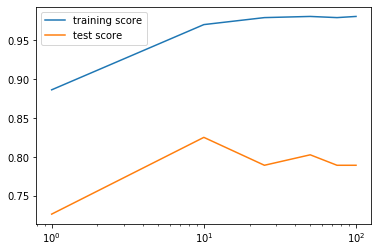

In [42]:
estimators = [1,10,25,50,75,100]
test_score = []
train_score = []
for n in estimators:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train,y_train)
    train_score.append(forest.score(X_train,y_train))
    test_score.append(forest.score(X_test,y_test))

plt.plot(estimators, train_score, label="training score")
plt.plot(estimators, test_score, label="test score")
plt.xscale('log')
plt.legend()

# AdaBoost 

Adaboost stands for adaptive boost and can be used for boosting any machine learning algorithm.
It aims to convert a set of weak classifier into a strong one

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada = AdaBoostClassifier()

In [45]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

### Evaluation

In [46]:
ada.score(X_train,y_train)

0.842814371257485

In [47]:
ada.score(X_test,y_test)

0.7982062780269058

AdaBoost is generalizing the data pretty well